# Capstone Project - Car Accident Severity (Week 2)
__Applied Data Science Capstone By IBM/Coursera__

## Introduction: Business Problem

The project is to predict the severity of the Accidents in Seattle in certain areas and their causes. By observations through the given dataset containing information and stats about the types and causes of the accidents, I have to predict the severity of the accident depending upon traffic delay, cars or buses involved and etc which would cause or play important role in prediction. 

In the given dataset, the data is provided like overspeeding, number of cars, buses, weather and road conditions. For prediction of severity we apply machine learning on dependent variable i.e severity. Therefore, Supervised learning will be used for this prediction.

## Data

By analyzing the data we have certain insights from the data which is provided:
1. Types of injuries
2. Location of Accidents
3. Weather/Road/Driver's Conditions
4. Cars/buses/pedestrians involved and their injury severity.

To help in predicting severity of accidents, we create dependent and independent variables and then apply train_test_split to split the data so that it can be applied to machine learning alogrithm which we will apply. We have to predict severity so it will be our dependent variable.

Machine Learning algorithm should be chosen wisely to predict more accurately and give less complicated results i.e results which are easily understandable.

## Data Cleaning

In [1]:
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
#import folium
import sklearn
import numpy as np

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Selecting only that columns from the original DataFrame
df2 = df1[['SEVERITYCODE','X','Y','OBJECTID','ADDRTYPE','LOCATION','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDATE','INCDTTM','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE','HITPARKEDCAR']]
df2.info()  #Checking if the attributes are valid or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 24 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
ADDRTYPE          192747 non-null object
LOCATION          191996 non-null object
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null object
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null object
WEATHER           189592 non-null object
ROADCOND          189661 non-null object
LIGHTCOND         189503 non-null object
PEDROWNOTGRNT     4667 non-null object
SPEEDING          9333 non-null obj

## Analysing data by grouping the data

In [4]:
df_sc = df2.groupby(["SEVERITYCODE"], axis = 0).mean()
print(df_sc)
df2["SEVERITYCODE"].describe()

                       X          Y      OBJECTID  PERSONCOUNT  PEDCOUNT  \
SEVERITYCODE                                                               
1            -122.330722  47.618888  107655.87677     2.329348  0.005268   
2            -122.330048  47.621058  110410.92782     2.714357  0.111896   

              PEDCYLCOUNT  VEHCOUNT  
SEVERITYCODE                         
1                0.004975  1.943312  
2                0.083316  1.867928  


count    194673.000000
mean          1.298901
std           0.457778
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: SEVERITYCODE, dtype: float64

In [5]:
df1.groupby(["SEVERITYCODE"]).count()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,132221,132221,136485,136485,136485,136485,136485,134750,37251,134081,...,132533,132405,460,81429,5802,136480,132622,136485,136485,136485
2,57118,57118,58188,58188,58188,58188,58188,57997,27819,57915,...,57128,57098,4207,33507,3531,58175,57147,58188,58188,58188


In [6]:
a = df1.groupby('SEVERITYCODE').count()['X'].sum(axis = 0)

In [7]:
np.set_printoptions(precision=2)
print((df1.groupby('SEVERITYCODE').count()['X']/a*100))
sev_per = (df1.groupby('SEVERITYCODE').count()['X']/a*100)

SEVERITYCODE
1    69.832945
2    30.167055
Name: X, dtype: float64


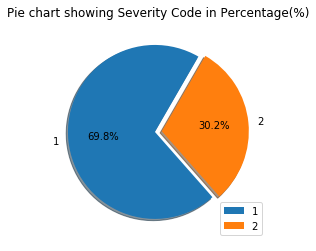

In [8]:
sev_per.plot(kind = "pie",startangle=60,shadow=True,autopct = "%1.1f%%", explode = [0.04,0.04])
plt.title('Pie chart showing Severity Code in Percentage(%)')
plt.ylabel('')
plt.legend()
plt.show()

In [9]:
sev_one = df2.loc[df2["SEVERITYCODE"]==1,:]
sev_two = df2.loc[df2["SEVERITYCODE"]==2,:]

sev1_weather = (sev_one.groupby('WEATHER').count()['X'])
sev1_collision = (sev_one.groupby('COLLISIONTYPE').count()['X'])
sev1_road = (sev_one.groupby('ROADCOND').count()['X'])
sev1_junct = (sev_one.groupby('JUNCTIONTYPE').count()['X'])
sev1_light = (sev_one.groupby('LIGHTCOND').count()['X'])
sev1_park = (sev_one.groupby('HITPARKEDCAR').count()['X'])
sev1_speed = (sev_one.groupby('SPEEDING').count()['X'])
print(sev1_collision,"\n")
print(sev1_road,"\n")
print(sev1_weather,"\n")
print(sev1_junct,"\n")
print(sev1_light,"\n")
print(sev1_speed,"\n")
print(sev1_park,"\n")

COLLISIONTYPE
Angles        20887
Cycles          666
Head On        1135
Left Turn      8242
Other         16481
Parked Car    43736
Pedestrian      670
Rear Ended    18749
Right Turn     2311
Sideswipe     15599
Name: X, dtype: int64 

ROADCOND
Dry               82615
Ice                 911
Oil                  33
Other                78
Sand/Mud/Dirt        42
Snow/Slush          823
Standing Water       76
Unknown           13125
Wet               30689
Name: X, dtype: int64 

WEATHER
Blowing Sand/Dirt              37
Clear                       73657
Fog/Smog/Smoke                369
Other                         663
Overcast                    18527
Partly Cloudy                   2
Raining                     21151
Severe Crosswind               17
Sleet/Hail/Freezing Rain       85
Snowing                       726
Unknown                     13115
Name: X, dtype: int64 

JUNCTIONTYPE
At Intersection (but not related to intersection)     1454
At Intersection (intersection relat

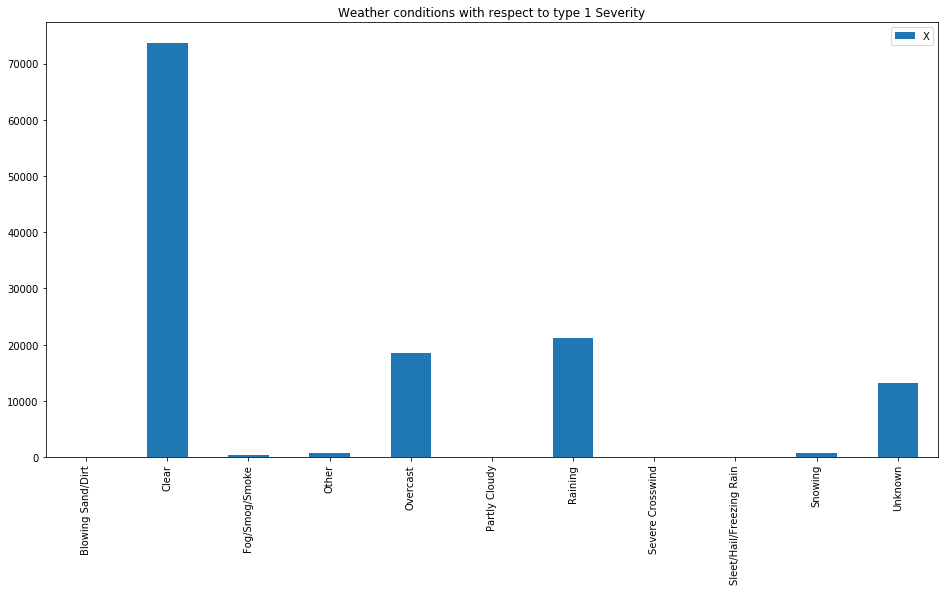

In [10]:
sev1_weather.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Weather conditions with respect to type 1 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

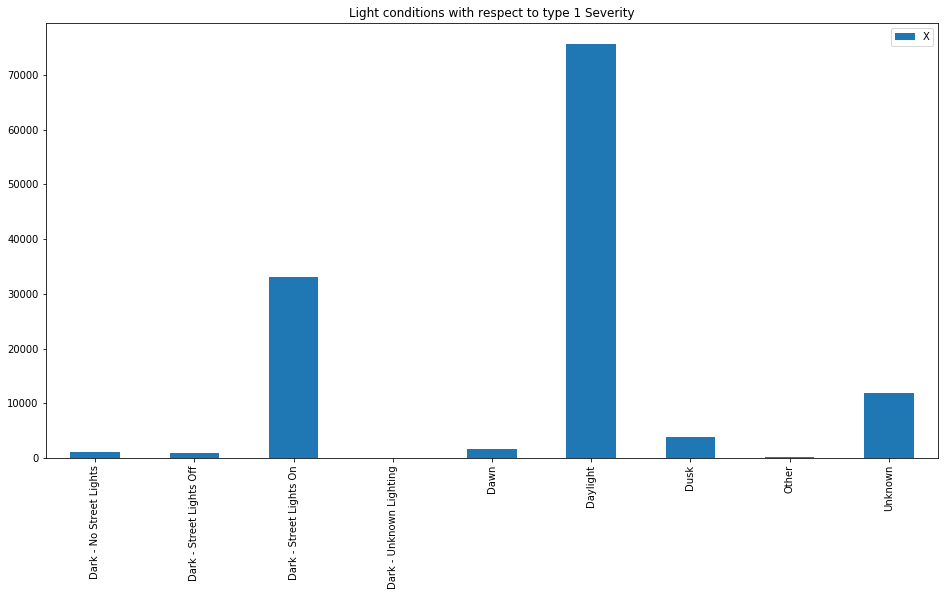

In [11]:
sev1_light.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Light conditions with respect to type 1 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

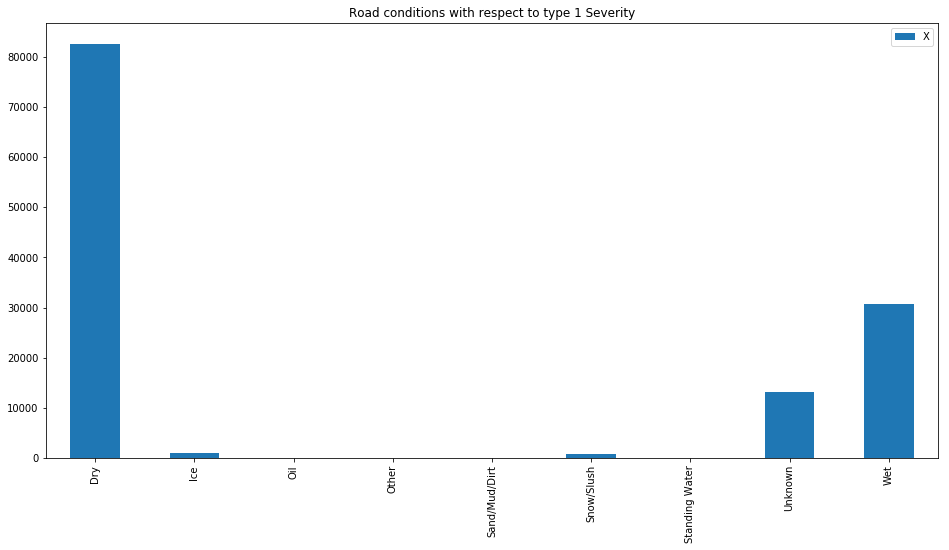

In [12]:
sev1_road.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Road conditions with respect to type 1 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

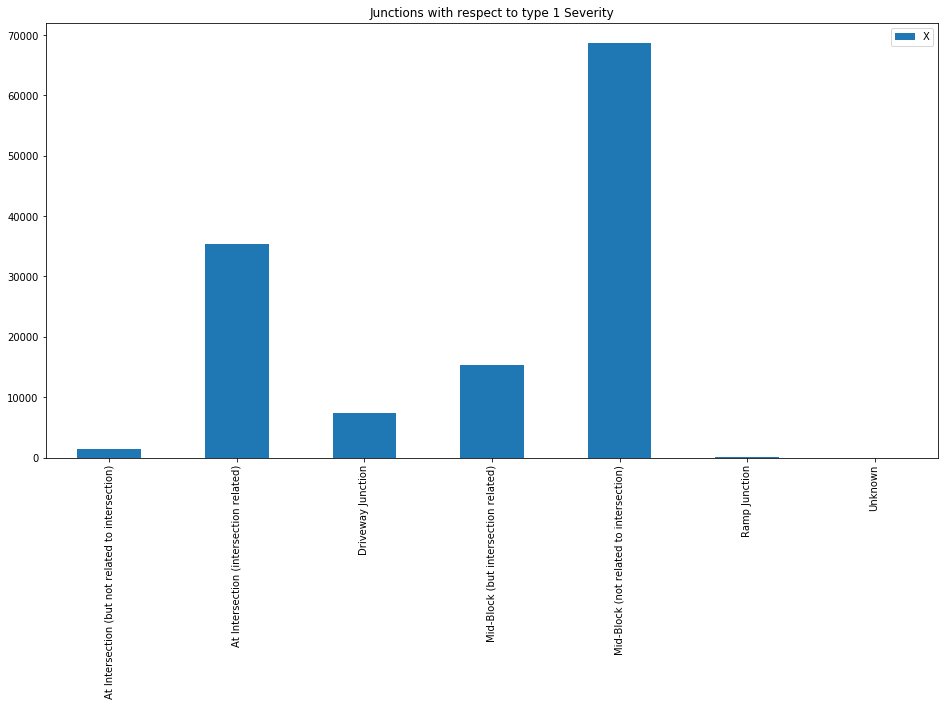

In [13]:
sev1_junct.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Junctions with respect to type 1 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

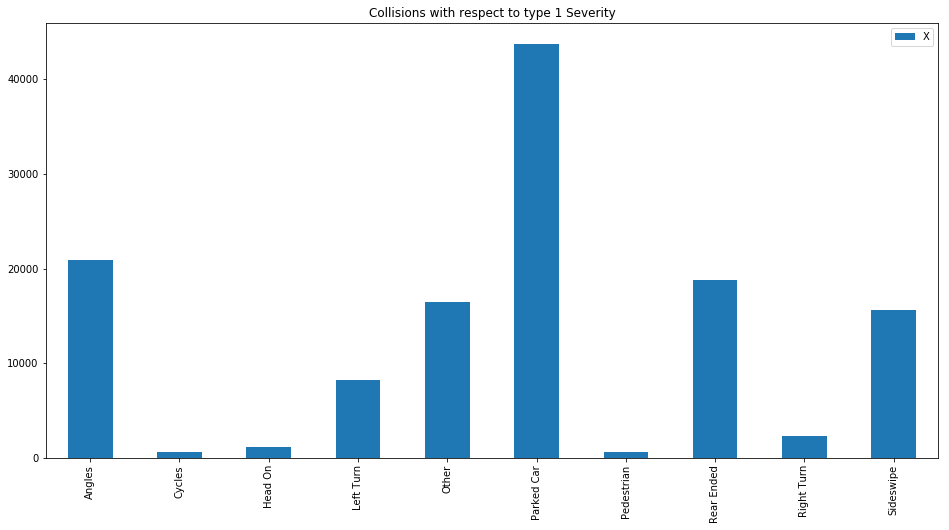

In [14]:
sev1_collision.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Collisions with respect to type 1 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

In [15]:
sev2_weather = (sev_two.groupby('WEATHER').count()['X'])
sev2_collision = (sev_two.groupby('COLLISIONTYPE').count()['X'])
sev2_road = (sev_two.groupby('ROADCOND').count()['X'])
sev2_junct = (sev_two.groupby('JUNCTIONTYPE').count()['X'])
sev2_light = (sev_two.groupby('LIGHTCOND').count()['X'])
sev2_park = (sev_two.groupby('HITPARKEDCAR').count()['X'])
sev2_speed = (sev_two.groupby('SPEEDING').count()['X'])
print(sev2_collision,"\n")
print(sev2_road,"\n")
print(sev2_weather,"\n")
print(sev2_junct,"\n")
print(sev2_light,"\n")
print(sev2_speed,"\n")
print(sev2_park,"\n")

COLLISIONTYPE
Angles        13573
Cycles         4712
Head On         862
Left Turn      5382
Other          5796
Parked Car     2645
Pedestrian     5881
Rear Ended    14219
Right Turn      601
Sideswipe      2435
Name: X, dtype: int64 

ROADCOND
Dry               39461
Ice                 266
Oil                  20
Other                39
Sand/Mud/Dirt        22
Snow/Slush          166
Standing Water       26
Unknown             714
Wet               15375
Name: X, dtype: int64 

WEATHER
Blowing Sand/Dirt              13
Clear                       35302
Fog/Smog/Smoke                184
Other                         110
Overcast                     8609
Partly Cloudy                   3
Raining                     10864
Severe Crosswind                7
Sleet/Hail/Freezing Rain       27
Snowing                       168
Unknown                       778
Name: X, dtype: int64 

JUNCTIONTYPE
At Intersection (but not related to intersection)      617
At Intersection (intersection relat

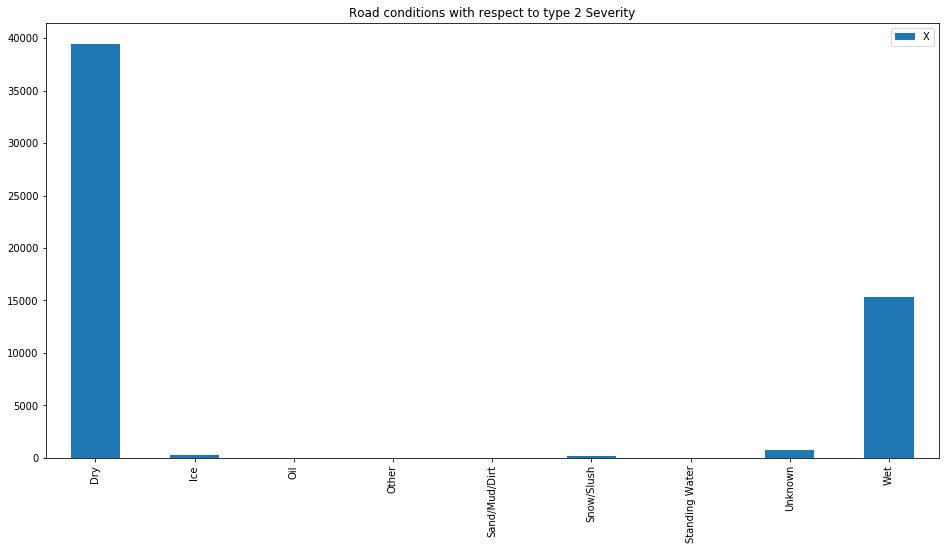

In [16]:
sev2_road.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Road conditions with respect to type 2 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

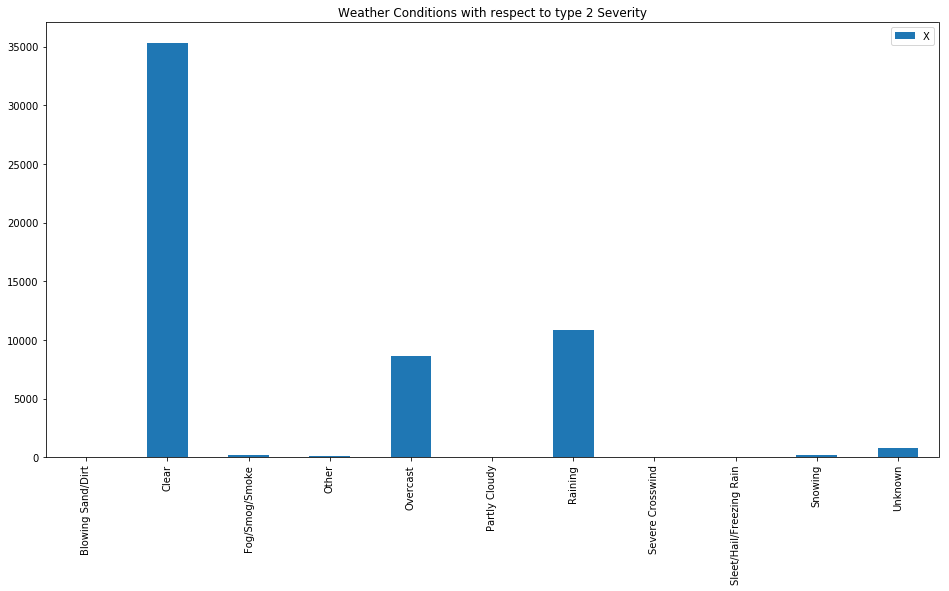

In [17]:
sev2_weather.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Weather Conditions with respect to type 2 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

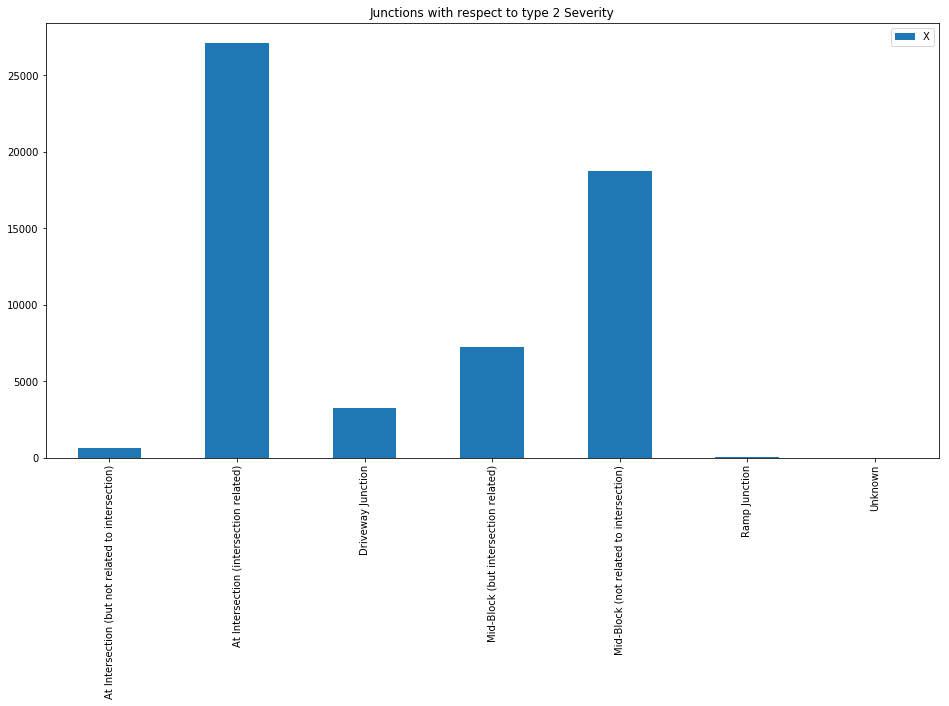

In [18]:
sev2_junct.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Junctions with respect to type 2 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

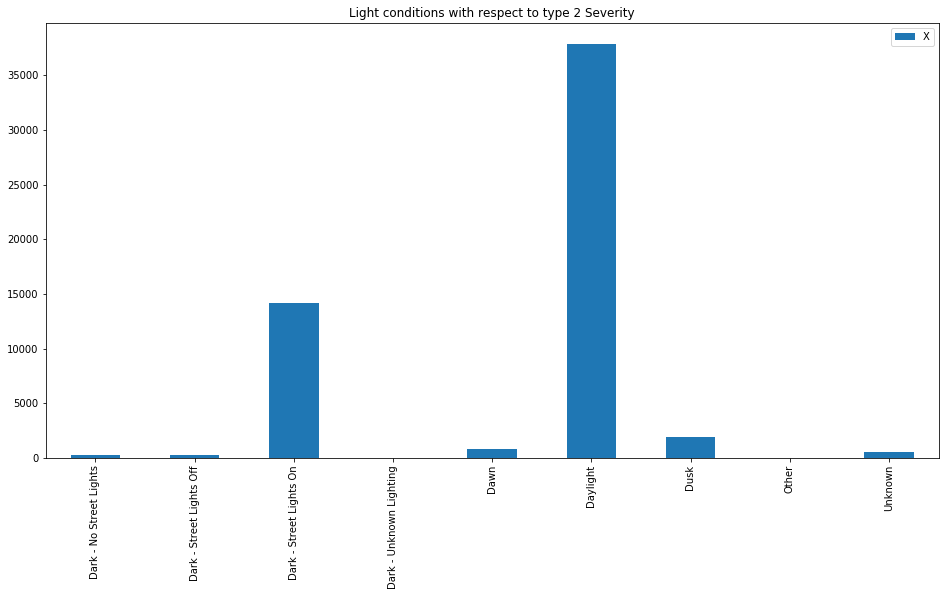

In [19]:
sev2_light.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Light conditions with respect to type 2 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

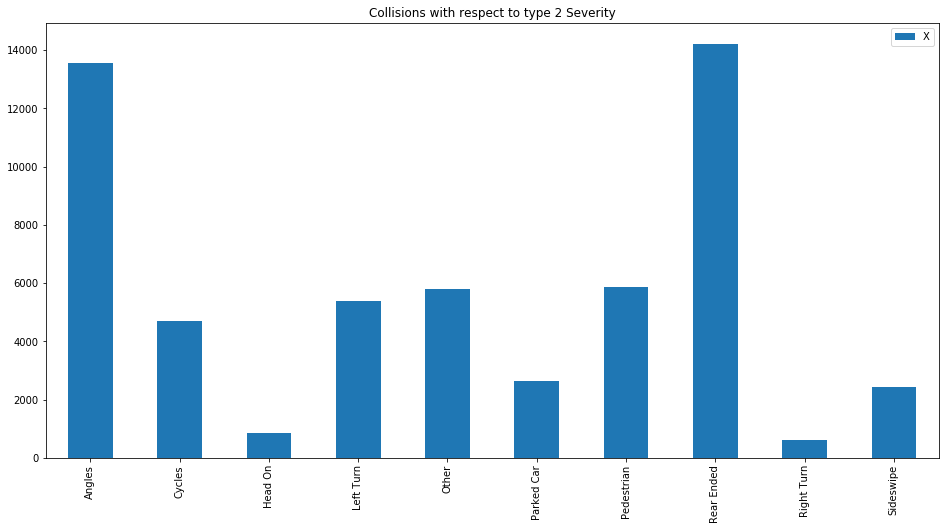

In [20]:
sev2_collision.plot(kind="bar", figsize=(16,8),edgecolor = None)
plt.title("Collisions with respect to type 2 Severity")
plt.legend()
plt.xlabel("")
plt.ylabel("")
plt.show()

## Model

### For modelling, we use regression (supervised learning) for predicting continuous values.

In [46]:
!conda install -c conda-forge statsmodels --yes
import statsmodels.api as sm

Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt



In [24]:
X = df1[["PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","PERSONCOUNT"]]
y = df1[["SEVERITYCODE"]]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)
print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(155738, 4) (155738, 1)
(38935, 4) (38935, 1)


In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 [1.12]
Coefficients: 
 [[0.59 0.62 0.01 0.05]]


In [48]:
print("Training set:\n",x_train.head())
print("Test set:\n",x_test.head())

Training set:
         PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  PERSONCOUNT
171760         0            0         2            2
73682          0            0         2            3
38234          0            0         2            5
162694         0            0         2            2
74022          0            0         2            3
Test set:
         PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  PERSONCOUNT
94063          0            0         2            2
137563         0            1         1            2
78237          0            0         2            2
105763         0            0         2            2
138711         0            0         2            2


In [43]:
person = 2
bicycle = 0
pedestrian = 1
vehicle = 2
y_pred = lr.predict([[pedestrian,bicycle,vehicle, person]])

## Maps

In [54]:
!wget --quiet https://data.seattle.gov/api/views/vwtx-gvpm/rows.json -O world_countries.json
!pip install folium
import folium
seattle_geo = r'world_countries.json' # geojson file

# creating a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

     |████████████████████████████████| 102kB 8.1MB/s ta 0:00:011


In [56]:
world_map = folium.Map(location=[47.6062, -122.3321], zoom_start=14, tiles='OpenStreetMap')

# display map
world_map

In [64]:
df_map = df1[["X","Y","SDOT_COLDESC"]]
df_map = df_map.fillna(0)

In [68]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
world_map = folium.Map(location = [47.6062, -122.3321], zoom_start = 11, tiles='Stamen Toner')

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(world_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_map.Y, df_map.X, df_map.SDOT_COLDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
world_map

# Conclusion

Considering all the results from our model and maps we conclude that:
1. As the dataset had many attributes and data, we use only significant amount of data for our calculations and models.
2. Accidents were distributed randomly and it was not easy to predict.
3. Weather conditions donot contribute for our project as mst of the accidents occured on clear weather.
4. Through our horizontal bar charts we obtain some observations which would help us predict severity of the accidents.